# The Spread of Forest Fires

This two-part tutorial illustrates different ways to model the spread of a fire among a certain forest. The parts, in brief, are as follows:

[Part 0]: We'll show how the spread of fire can be modeled over a geometric region using cellular automata (CA).

[Part 1]: This part explains how to use and implement a Markov chain model for forest fire spread.

## Part 0: A cellular automata model# 

In the first part of this tutorial, we'll apply the concept of cellular automata to the modeling of fire spread.

### The phenomenon to be modeled and simulated 

Suppose we wish to model the spread of fire in forest with geographically randomly distributed trees. Assume there is a square-shaped geographical area, represented as a CA space, in which trees (1) are distributed with some given probability, p. That is, p = 0 means there are no trees in the space, whereas p = 1 means trees are everywhere with no open space left in the area. Then, you set fire (2) to one of the trees in this forest to see if the fire you tarted eventually destroys the entire forest (don’t do this in real life!!). A tree will catch fire if there is at least one tree burning in its neighborhood, and the burning tree will be charred (3) completely after one time step.

As a first cut, let's try using a cellular automaton (CA) as the conceptual model. We will refer to the specific model we develop as the SIR-CA model, as noted above.

Note that this model doesn’t have cyclic local dynamics; possible state transitions are always one way from a tree (1) to a burning tree (2) to being charred (3), which is different rom the previous two examples. So the whole system eventually falls into a static final onfiguration with no further changes possible. But the total area burned in the final onfiguration greatly depends on the density of trees p. If you start with a sufficiently arge value of p, you will see that a significant portion of the forest will be burned down ventually. This phenomenon is called percolation in statistical physics, which intuitively eans that something found a way to go through a large portion of material from one side to the other.
Let's associate these states with the following integers:


In [ ]:
# Possible states:
EMPTY_SITE = 0,
ALIVE_TREE = 1,
BURNING_TREE = 2,
CHAR = 3

Following these states, we create a 10 by 10 grid with randomly picked state for each cell. The global status of the grid can be updated using BFS by each time step.

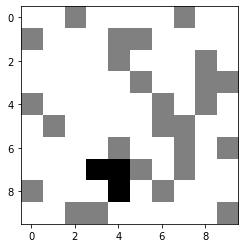

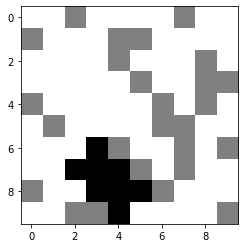

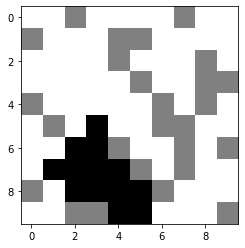

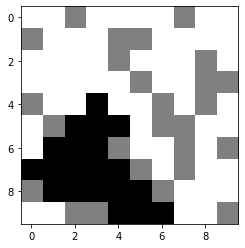

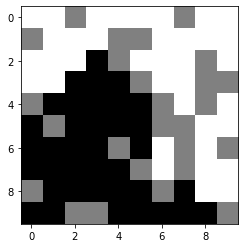

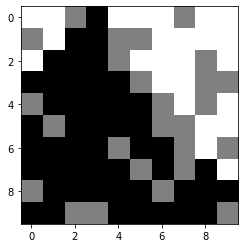

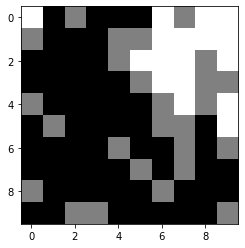

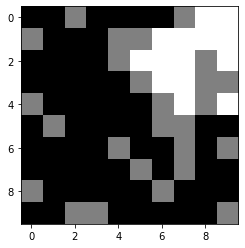

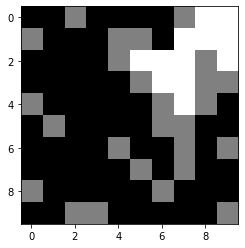

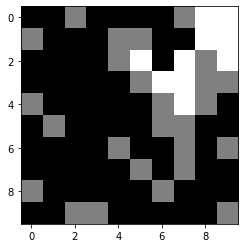

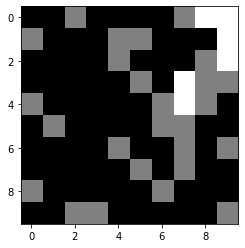

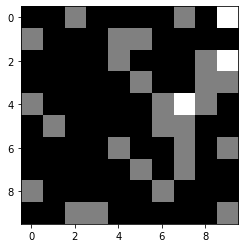

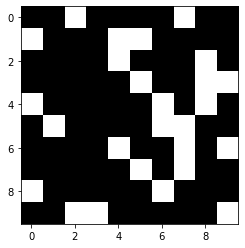

In [1]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
mat = np.zeros ((5, 5))

m=10
n=10
Graph=np.zeros([m,n],int)
forest_ratio=0.7
fire_candidates=[]

for i in range(m):
    for j in range(n):
        rd=np.random.randint(0,100)/100
        #print(rd)
        if rd<forest_ratio:
            Graph[i][j]=1
            fire_candidates.append((i,j))
        else:
            Graph[i][j]=0
# print(Graph)

T=0
fire=random.choice(fire_candidates)
#print (fire)

in_fire=[fire]
directions=[(-1,0),(1,0),(0,1),(0,-1)]
while in_fire:
    for _ in range(len(in_fire)):
        x,y=in_fire.pop(0)
        Graph[x][y]=-1
        for dir in directions:
            nx,ny=x+dir[0],y+dir[1]
            if 0<=nx<m and 0<=ny<n and Graph[nx][ny]==1:
                in_fire.append((nx,ny))
        T+=1
    if not T%10==1:
        # print(T,Graph)
        plt.imshow(Graph,cmap = 'gray',interpolation='nearest')
        plt.show()
        
